In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

In [87]:
df = pd.read_csv("/kaggle/input/top-rated-tv-shows/data_TV.csv")# file loaded

In [88]:
df.dtypes # data types various features

first_air_date        object
origin_country        object
original_language     object
name                  object
popularity           float64
vote_average         float64
vote_count             int64
overview              object
dtype: object

In [89]:
df.size

20936

In [90]:
df.shape

(2617, 8)

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2617 entries, 0 to 2616
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   first_air_date     2611 non-null   object 
 1   origin_country     2617 non-null   object 
 2   original_language  2617 non-null   object 
 3   name               2617 non-null   object 
 4   popularity         2617 non-null   float64
 5   vote_average       2617 non-null   float64
 6   vote_count         2617 non-null   int64  
 7   overview           2552 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 163.7+ KB


In [92]:
df.isnull().sum()# checking the null value

first_air_date        6
origin_country        0
original_language     0
name                  0
popularity            0
vote_average          0
vote_count            0
overview             65
dtype: int64

In [123]:
df.head(20)# displying first 20 rows

,first_air_date,origin_country,original_language,name,popularity,vote_average,vote_count,overview
0,2021-09-03,US,en,The D'Amelio Show,30.104,9.0,3071,From relative obscurity and a seemingly normal...
1,2008-01-20,US,en,Breaking Bad,468.253,8.8,10131,"When Walter White, a New Mexico chemistry teac..."
2,2021-11-06,US,en,Arcane,95.667,8.7,2615,Amid the stark discord of twin cities Piltover...
3,2013-12-02,US,en,Rick and Morty,1511.996,8.7,7220,Rick is a mentally-unbalanced but scientifical...
4,2022-04-14,US,en,The Kardashians,195.038,8.7,1627,The family you know and love is here with a br...
5,2016-04-03,JP,ja,My Hero Academia,106.235,8.7,3909,In a world where eighty percent of the populat...
6,2017-03-19,CA,en,Anne with an E,117.989,8.7,4064,"A coming-of-age story about an outsider who, a..."
7,2019-04-06,JP,ja,Demon Slayer: Kimetsu no Yaiba,103.762,8.7,4422,"It is the Taisho Period in Japan. Tanjiro, a k..."
8,1999-10-20,JP,ja,One Piece,101.767,8.7,3318,"Years ago, the fearsome Pirate King, Gol D. Ro..."
9,2009-04-05,JP,ja,Fullmetal Alchemist: Brotherhood,89.893,8.7,1450,Edward and Alphonse Elric's reckless disregard...


In [124]:
df.tail(5) # displaying last 5 rows

,first_air_date,origin_country,original_language,name,popularity,vote_average,vote_count,overview
2612,2002-06-11,US,en,American Idol,34.052,5.2,135,"Each year, hopeful singers from all over the c..."
2613,2000-07-05,US,en,Big Brother,47.029,4.9,190,American version of the reality game show whic...
2614,1997-03-31,GB,en,Teletubbies,36.875,4.1,108,"Pre-school fun, fantasy and education with col..."
2615,1985-02-19,GB,en,EastEnders,108.720,3.9,183,The everyday lives of working-class residents ...
2616,2006-10-09,CA,fr,La Job,6.968,0.6,162,La Job is a French Canadian comedy television ...


In [94]:
df.duplicated()# checking the duplicate data

0       False
1       False
2       False
3       False
4       False
        ...  
2612    False
2613    False
2614    False
2615    False
2616    False
Length: 2617, dtype: bool

In [95]:
# visualizing the "popularity" Column based on "voteaverage"

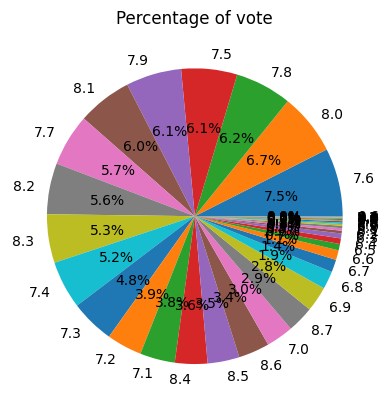

In [126]:
grade = df['vote_average'].value_counts() # piechart of vote_average

plt.pie(grade, labels=grade.index, autopct='%1.1f%%')
plt.title('Percentage of vote')
plt.show()

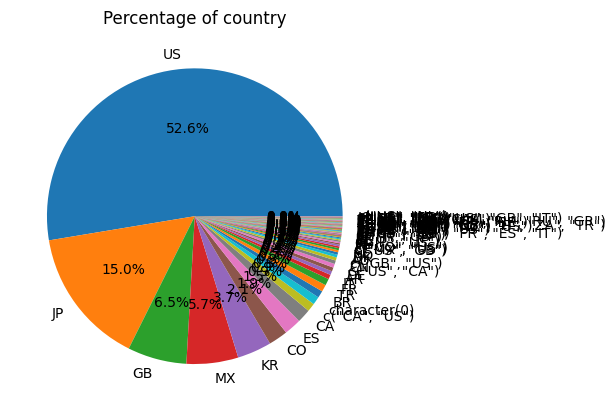

In [97]:
grade = df['origin_country'].value_counts() # piechart of origin country

plt.pie(grade, labels=grade.index, autopct='%1.1f%%')
plt.title('Percentage of country')
plt.show()

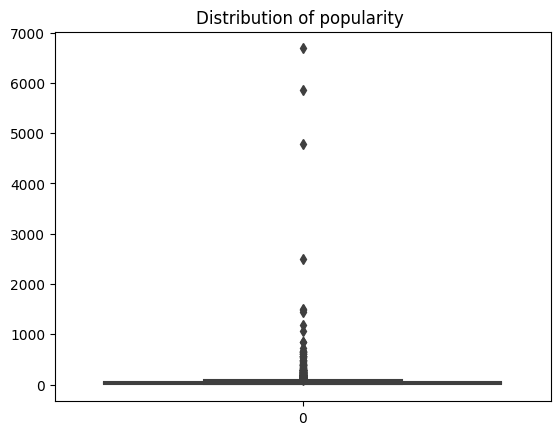

In [98]:
sns.boxplot(df['popularity']) #boxplot of popularity
plt.title('Distribution of popularity ')
plt.show()

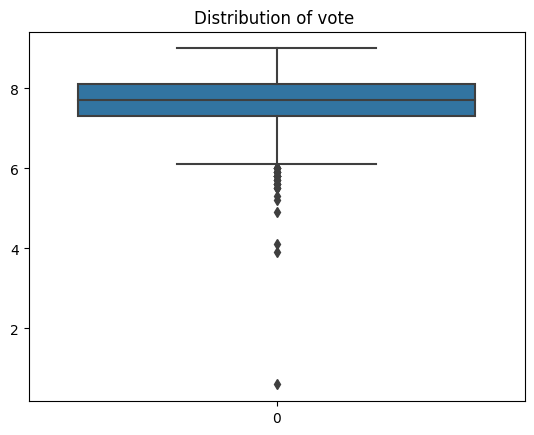

In [99]:
sns.boxplot(df['vote_average']) # boxplot of vote_average
plt.title('Distribution of vote ')
plt.show()

In [110]:
name=['Breaking Bad','Arcane','Rick and Morty','One Piece']
popularity=[468.253,95.667,1511.996,101.767]
vote_average=[8.8,8.7,8.7,8.7]

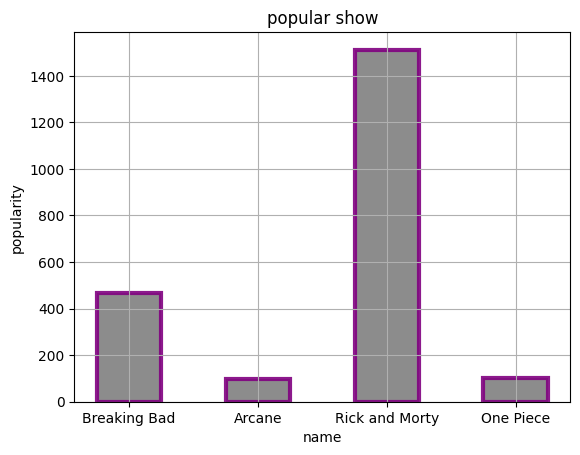

In [111]:
plt.title('popular show') # bar plot which show the popularity and shows name
plt.xlabel('name')
plt.ylabel('popularity')
plt.bar(name,popularity,color='gray',edgecolor='purple',width=0.5,linewidth=3,alpha=0.9);
plt.grid()

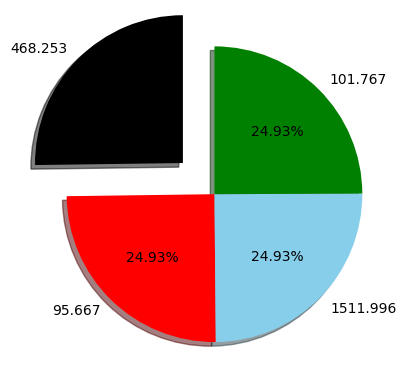

In [114]:
colors=['black','red','skyblue','green'] # pie chart
plt.pie(vote_average,labels=popularity, autopct= '%.2f%%',labeldistance=1.1,startangle=90,shadow=True,explode=[0.3,0,0,0],
       colors=colors);


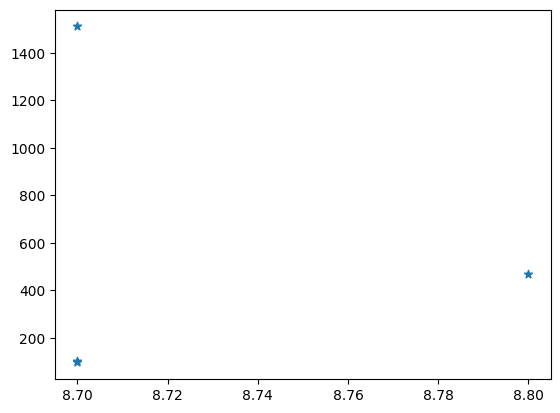

In [117]:
plt.scatter(vote_average,popularity,marker='*'); #scatter plot

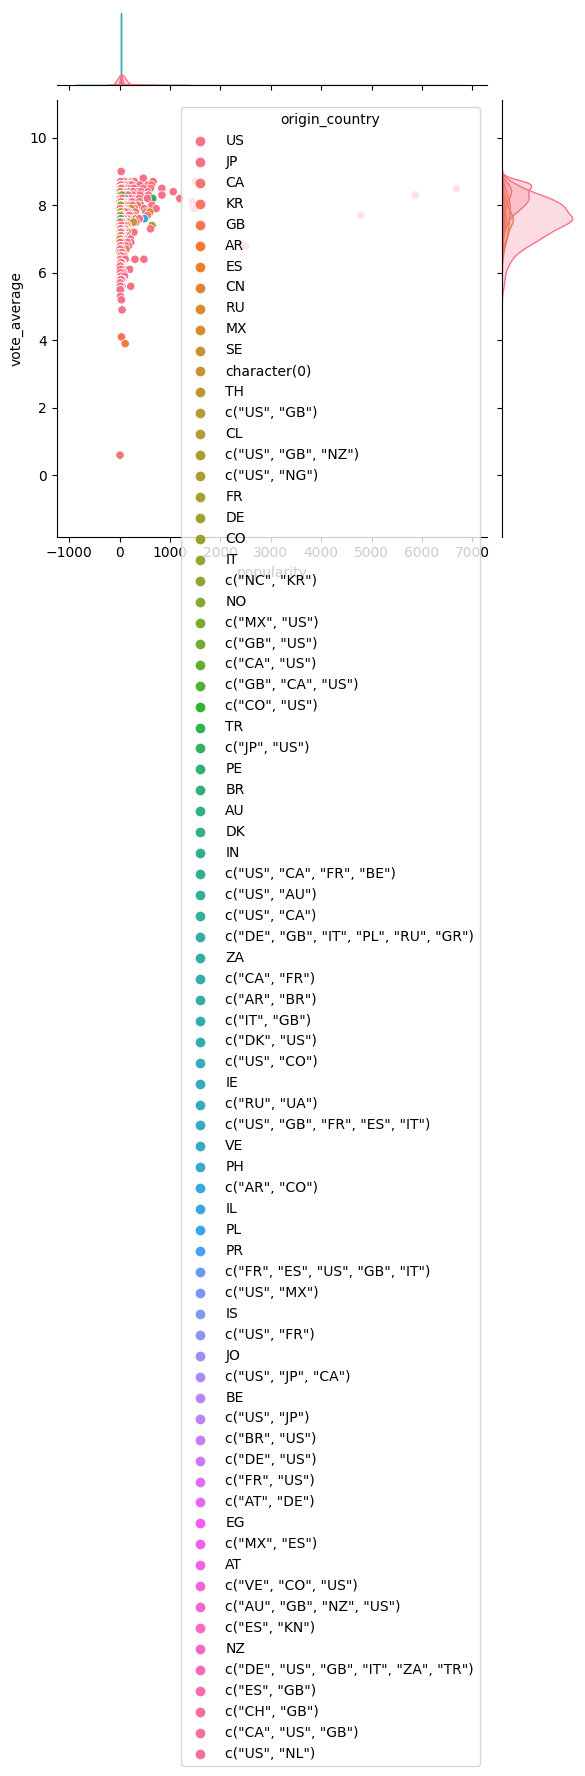

In [120]:
sns.jointplot(x='popularity',y='vote_average',data=df,hue='origin_country') # Joint plot

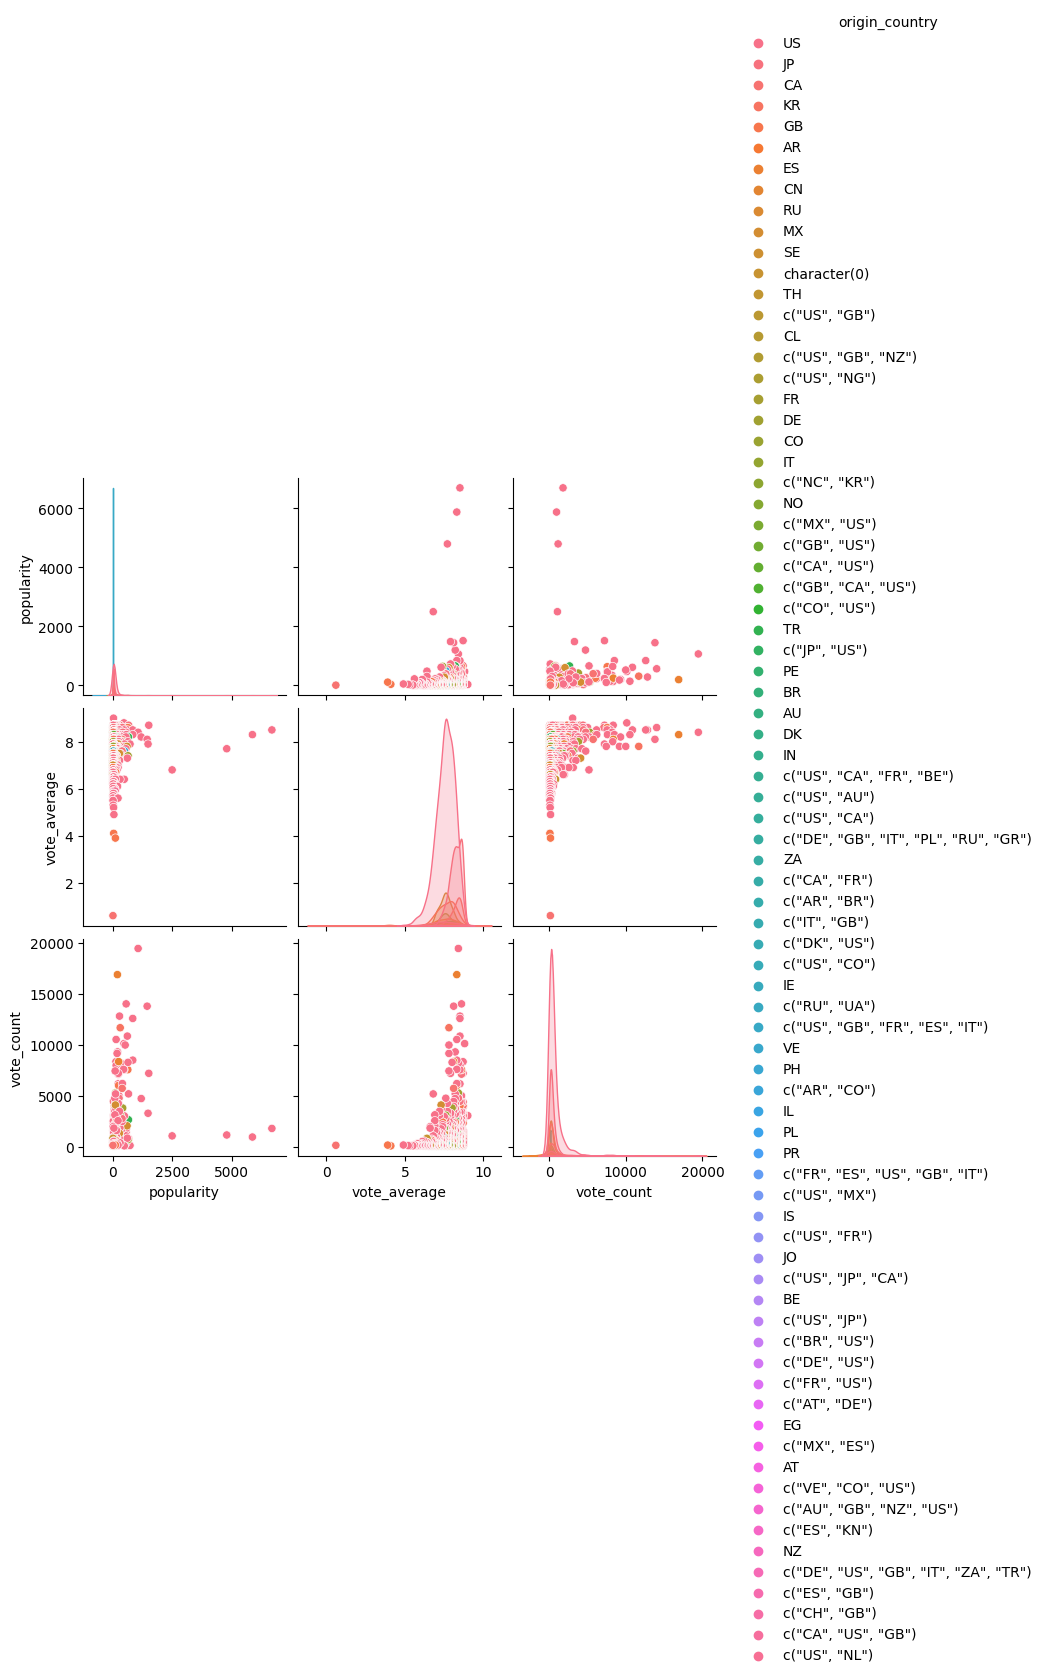

In [121]:
sns.pairplot(df,hue='origin_country'); # pair plot